In [2]:
# (hackle 관련 데이터)

import pandas as pd

# hackle_events = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/hackle/hackle_events.parquet')
hackle_events = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/hackle/processed_hackle_events_processed.parquet') # 전처리 데이터
hackle_device_properties = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/hackle/device_properties.parquet')
hackle_user_properties = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/hackle/user_properties.parquet')
hackle_properties = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/hackle/hackle_properties.parquet')


In [3]:
# (votes 관련 데이터)

import pandas as pd

accounts_attendance = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_attendance.parquet') # 출석 테이블
# accounts_blockrecord = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_blockrecord.parquet')
accounts_blockrecord = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/processed_accounts_blockrecord_processed.parquet') # 차단 기록 테이블 (전처리)
accounts_failpaymenthistory = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_failpaymenthistory.parquet') # 상품 구매 실패 기록 테이블
accounts_friendrequest = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_friendrequest.parquet') # 친구 요청 테이블
accounts_group = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_group.parquet') # 학급 테이블
accounts_nearbyschool = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_nearbyschool.parquet') # 가까운 학교를 기록해두기 위한 관계형 테이블
accounts_paymenthistory = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_paymenthistory.parquet') # 구매 기록 테이블
accounts_user_contacts = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_user_contacts.parquet') # 유저 컨택 테이블
accounts_pointhistory = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_pointhistory.parquet') # 포인트 기록 테이블
accounts_school = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_school.parquet') # 학교 테이블
accounts_timelinereport = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_timelinereport.parquet') # 유저 신고 기록 테이블
# accounts_user = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_user.parquet')
accounts_user = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/processed_accounts_user_processed.parquet') # 유저 테이블 (전처리)
# accounts_userquestionrecord = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_userquestionrecord.parquet')
accounts_userquestionrecord = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/processed_accounts_userquestionrecord_processed.parquet') # 투표 기록 테이블 (전처리)
accounts_userwithdraw = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/accounts_userwithdraw.parquet') # 포인트 이벤트 참여 테이블
event_receipts = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/event_receipts.parquet')
events = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/events.parquet') # 포인트 이벤트 테이블
polls_question = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/polls_question.parquet') # 질문 내용 테이블
polls_questionpiece = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/polls_questionpiece.parquet') # 질문 내용에 대한 신고 기록 테이블
polls_questionreport = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/polls_questionreport.parquet')
polls_questionset = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/polls_questionset.parquet') # 질문 세트 테이블
polls_usercandidate = pd.read_parquet('C:/Users/User/Desktop/codeit.ds/final_project/final_project_data/votes/polls_usercandidate.parquet') # 질문에 등장하는 유저들 테이블

# 구매 기록 테이블 EDA

In [ ]:
# 구매 기록 테이블  (23년 5월 ~ 24년 5월)
display(accounts_paymenthistory.sort_values(by='created_at'))

print('구매한 유저 수:', accounts_paymenthistory['user_id'].nunique(),'\n')
print(accounts_paymenthistory['productId'].value_counts(),'\n')
print('IOS와 Android:', accounts_paymenthistory['phone_type'].value_counts())


In [ ]:
# 구매 시간과 포인트 획득 시간이 같은 데이터
temp = accounts_paymenthistory.merge(accounts_pointhistory, how='inner', on='user_id').sort_values(by = 'delta_point')
temp[temp['created_at_x'] == temp['created_at_y']]

In [ ]:
# heart.4000 상품을 구매한 데이터의 포인트

temp = accounts_paymenthistory.merge(accounts_pointhistory, how='left', on='user_id').sort_values(by = 'delta_point')
temp = temp[temp['productId'] == 'heart.4000']
temp[temp['created_at_x'] == temp['created_at_y']]

# heart.4000 상품을 구매했으나 포인트 기록 데이터에서는 기록되지 않음

# 포인트 기록 테이블 EDA

In [ ]:
# 포인트 기록 테이블
display(accounts_pointhistory)

display(accounts_pointhistory[accounts_pointhistory['delta_point'] < 0])

print('포인트 사용: ', accounts_pointhistory[accounts_pointhistory['delta_point'] < 0]['delta_point'].value_counts(), '\n')
print('포인트 획득: ', accounts_pointhistory[accounts_pointhistory['delta_point'] > 0]['delta_point'].value_counts(), '\n')
print('포인트 획득 nuinque: ', accounts_pointhistory[accounts_pointhistory['delta_point'] > 0]['delta_point'].nunique())

In [ ]:
# 포인트별 획득 비율 

pd.set_option('display.max_rows', None)

print(accounts_pointhistory[accounts_pointhistory['delta_point'] > 0]['delta_point'].value_counts(normalize=True) * 100)

In [ ]:
# 포인트 사용
use_point = accounts_pointhistory[accounts_pointhistory['delta_point'] < 0]
display(use_point)

print(use_point.isna().sum())

In [ ]:
# 유저별 총 포인트

accounts_pointhistory.sort_values(by='user_id').groupby('user_id').agg({'delta_point': 'sum'}).reset_index().sort_values(by='delta_point', ascending=False)

In [ ]:
# 이벤트 테이블과 merge

event_but_nop = event_receipts.merge(accounts_pointhistory, how='left', on='user_id')
display(event_but_nop)
# 이벤트로 포인트를 획득했는데, 포인트 기록 테이블에는 기록이 없는 경우가 있음

event_but_nop_notnull = event_but_nop[event_but_nop['delta_point'].isna() == False]
display(event_but_nop_notnull)
# 기록 없는 경우 제거

event_but_nop_notnull[event_but_nop_notnull['created_at_x'] == event_but_nop_notnull['created_at_y']]
# 전체 2802개 행 중 6개 행만 이벤트로 획득한 포인트 -> 포인트 기록 테이블에 기록이 되어 있음

# 결측/중복/이상값 파악

In [ ]:
df_named_list = [
    ("accounts_attendance", accounts_attendance),
    ("accounts_blockrecord", accounts_blockrecord),
    ("accounts_failpaymenthistory", accounts_failpaymenthistory),
    ("accounts_friendrequest", accounts_friendrequest),
    ("accounts_group", accounts_group),
    ("accounts_nearbyschool", accounts_nearbyschool),
    ("accounts_paymenthistory", accounts_paymenthistory),
    ("accounts_user_contacts", accounts_user_contacts),
    ("accounts_pointhistory", accounts_pointhistory),
    ("accounts_school", accounts_school),
    ("accounts_timelinereport", accounts_timelinereport),
    ("accounts_user", accounts_user),
    ("accounts_userquestionrecord", accounts_userquestionrecord),
    ("accounts_userwithdraw", accounts_userwithdraw),
    ("event_receipts", event_receipts),
    ("events", events),
    ("polls_question", polls_question),
    ("polls_questionpiece", polls_questionpiece),
    ("polls_questionreport", polls_questionreport),
    ("polls_questionset", polls_questionset),
    ("polls_usercandidate", polls_usercandidate),
]



for name, ddf in df_named_list:
    missing = ddf.isna().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(f"{name} 결측치:")
        print(missing)
        print("-" * 40)

In [ ]:
# accounts_failpaymenthistory 관련 결측치
# phone_type이 IOS인 경우 productId가 100% 결측치

display(accounts_failpaymenthistory.sort_values(by='created_at'))
temp = accounts_failpaymenthistory[accounts_failpaymenthistory['productId'].isna() == True].sort_values(by='created_at')
display(temp)
temp['phone_type'].value_counts()

In [ ]:
# 모든 데이터의 중복값 확인
# 모든 컬럼이 중복인 경우는 없음

for name, ddf in df_named_list:
    duplicates = ddf.duplicated().sum()
    if duplicates > 0:
        print(f"{name} 중복값 개수: {duplicates}")
    else:
        print(f"{name} 중복값 없음")

In [ ]:
# accounts_blockrecord 테이블의 차단한 유저-차단 당한 유저 쌍 중복
# 차단 해제하고 다시 차단한 건가? -> 근데 모르는 사람인데 차단 해제를 할까? -> 서비스 환경에 문제가 있어서 차단이 제대로 안된 건 아닌가? (인스타에서도 관심없음 눌러도 계속 나옴)
display(accounts_blockrecord[accounts_blockrecord.duplicated(subset = ['user_id', 'block_user_id'])])

# accounts_friendrequest 테이블의 친추 요청 유저-친추 받는 유저 쌍 중복
accounts_friendrequest_dup = accounts_friendrequest[accounts_friendrequest.duplicated(subset= ['send_user_id', 'receive_user_id'])].sort_values(by = ['send_user_id', 'receive_user_id'])
display(accounts_friendrequest_dup)

# accounts_timelinereport 테이블의 유저-신고 당한 유저 쌍 중복
accounts_timelinereport_dup = accounts_timelinereport[accounts_timelinereport.duplicated(subset= ['user_id', 'reported_user_id'])].sort_values(by = ['user_id', 'reported_user_id'])
display(accounts_timelinereport_dup)

In [ ]:
accounts_timelinereport_dup.groupby(['user_id'])['reported_user_id'].count().reset_index().sort_values(by='reported_user_id', ascending=False)

In [ ]:
accounts_timelinereport_dup[accounts_timelinereport_dup['user_id'] == 1343904]

In [ ]:
# 자기 자신을 투표한 기록

self_vote = accounts_userquestionrecord[accounts_userquestionrecord['user_id'] == accounts_userquestionrecord['chosen_user_id']]

# is_self_vote 컬럼을 추가하여, user_id와 chosen_user_id가 같은 경우 1, 아닌 경우 0으로 표시
# accounts_userquestionrecord['is_self_vote'] = (accounts_userquestionrecord['user_id'] == accounts_userquestionrecord['chosen_user_id']).astype(int)
# accounts_userquestionrecord

In [ ]:
accounts_userquestionrecord['is_self_vote'].value_counts()

# 개인별 관심 분석 주제 탐색

### 전체 가입 유저 중 투표를 몇 명이나 하는지 퍼널 분석

In [4]:
# 유저 테이블
display(accounts_user)

# 전체 유저 수 확인
accounts_user['id'].nunique()
print(f"전체 유저 수: {accounts_user['id'].nunique()}")

# staff인 사람 몇 명인지 확인
staff_count = accounts_user[accounts_user['is_staff'] == True].shape[0]
print(f"Staff인 유저 수: {staff_count}")
# superuser인 사람 몇 명인지 확인
superuser_count = accounts_user[accounts_user['is_superuser'] == True].shape[0]
print(f"Superuser인 유저 수: {superuser_count}")

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,...,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_count,is_point_specialist,is_friend_specialist,is_specialist,specialist_type
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],...,0,0,0,0,NaN,6,False,False,False,normal
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],...,253,40878,5499,110,12.0,43,False,False,False,normal
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],...,0,37,0,47,1.0,51,False,False,False,normal
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],...,0,19,0,21,1.0,57,False,False,False,normal
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],...,0,29,0,15,12.0,18,False,False,False,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677080,1583729,0,0,M,300,[],1,2024-05-08 21:54:33.621408,[],[],...,0,0,0,0,32442.0,0,False,False,False,normal
677081,1583730,0,0,M,420,"[1109507, 1110921, 1111072, 1110054, 1108393, ...",0,2024-05-09 07:08:11.001817,[],[],...,0,1,0,0,43949.0,21,False,False,False,normal
677082,1583731,0,0,M,300,"[1583732, 1583673]",1,2024-05-09 07:22:19.186439,[],[],...,0,1,0,0,18640.0,2,False,False,False,normal
677083,1583732,0,0,F,300,"[1583673, 1583730, 1583731]",1,2024-05-09 07:22:38.387553,[],[],...,0,0,0,0,18640.0,3,False,False,False,normal


전체 유저 수: 677085
Staff인 유저 수: 3
Superuser인 유저 수: 2


In [5]:
# 투표 기록 테이블
display(accounts_userquestionrecord)

# 유저 테이블과 투표 기록 테이블 merge하여 전체 유저 중 몇 명이 투표를 했는지 확인
merged_df = accounts_user.merge(accounts_userquestionrecord, how='inner', left_on='id', right_on='user_id')
# 투표를 한 유저 수
voted_users_count = merged_df['user_id'].nunique()
print(f"투표를 한 유저 수: {voted_users_count}")
# 투표를 한 유저의 비율
total_users_count = accounts_user['id'].nunique()
voted_users_ratio = voted_users_count / total_users_count * 100
print(f"투표를 한 유저의 비율: {voted_users_ratio:.2f}%")

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times,is_self_love
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0,False
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0,False
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0,False
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0,False
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217553,161666166,C,2024-05-07 11:29:07,945560,2614,1001607,190864020,1,N,2024-05-07 11:29:07,0,0,False
1217554,161666461,C,2024-05-08 01:34:56,850774,1679,855525,200139931,0,N,2024-05-08 01:34:56,0,0,False
1217555,161666462,C,2024-05-08 01:35:02,855509,2605,855525,200139932,0,N,2024-05-08 01:35:02,0,0,False
1217556,161666463,C,2024-05-08 01:36:00,855526,3801,855525,200139933,0,N,2024-05-08 01:36:00,0,0,False


투표를 한 유저 수: 4849
투표를 한 유저의 비율: 0.72%


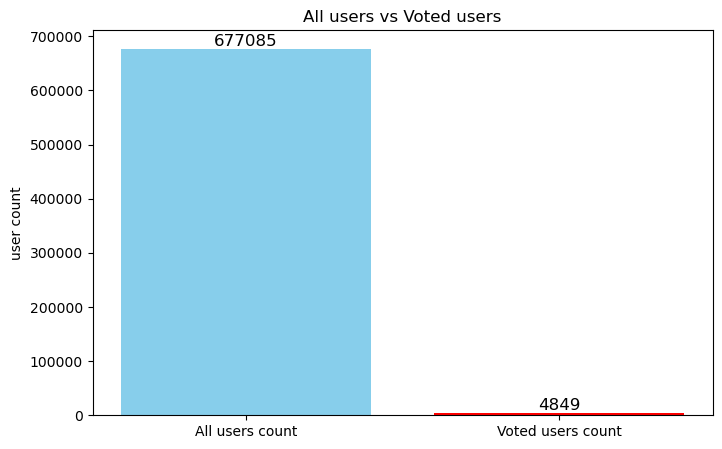

In [6]:
# 전체 유저 -> 투표 한 유저 퍼널 시각화 하기
import matplotlib.pyplot as plt
# 퍼널 시각화
labels = ['All users count', 'Voted users count']
values = [total_users_count, voted_users_count]
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['skyblue', 'red'])
# 바 그래프 위에 숫자 표시
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=12)
plt.title('All users vs Voted users')
plt.ylabel('user count')
plt.show()

In [7]:
import plotly.graph_objects as go

# 단계별 값 정의 (예: 퍼널 단계)
stages = ['All users count', 'Voted users count']
values = [total_users_count, voted_users_count]

# 퍼널 차트 생성
fig = go.Figure(go.Funnel(
    y = stages,
    x = values,
    textinfo = 'text',
    texttemplate = "%{label}: %{x:,}명<br>이전 대비 %{percentPrevious:.1%}"
))

fig.show()

In [ ]:
# 월별 유저 수와 월별 투표한 유저 수 시각화

# 월별 유저 수와 월별 투표한 유저 수를 계산
accounts_user['created_at'] = pd.to_datetime(accounts_user['created_at'])
accounts_user['created_at_month'] = accounts_user['created_at'].dt.to_period('M')
monthly_user_count = accounts_user.groupby('created_at_month').size().reset_index(name='user_count')

accounts_userquestionrecord['created_at'] = pd.to_datetime(accounts_userquestionrecord['created_at'])
accounts_userquestionrecord['created_at_month'] = accounts_userquestionrecord['created_at'].dt.to_period('M')
monthly_voted_user_count = accounts_userquestionrecord.groupby('created_at_month')['user_id'].nunique().reset_index(name='voted_user_count')

,created_at_month,user_count
0,2023-03,33
1,2023-04,19060
2,2023-05,635505
3,2023-06,16737
4,2023-07,1849
5,2023-08,524
6,2023-09,605
7,2023-10,409
8,2023-11,731
9,2023-12,231


,created_at_month,voted_user_count
0,2023-04,338
1,2023-05,4797
2,2023-06,1872
3,2023-07,389
4,2023-08,170
5,2023-09,178
6,2023-10,46
7,2023-11,22
8,2023-12,26
9,2024-01,19


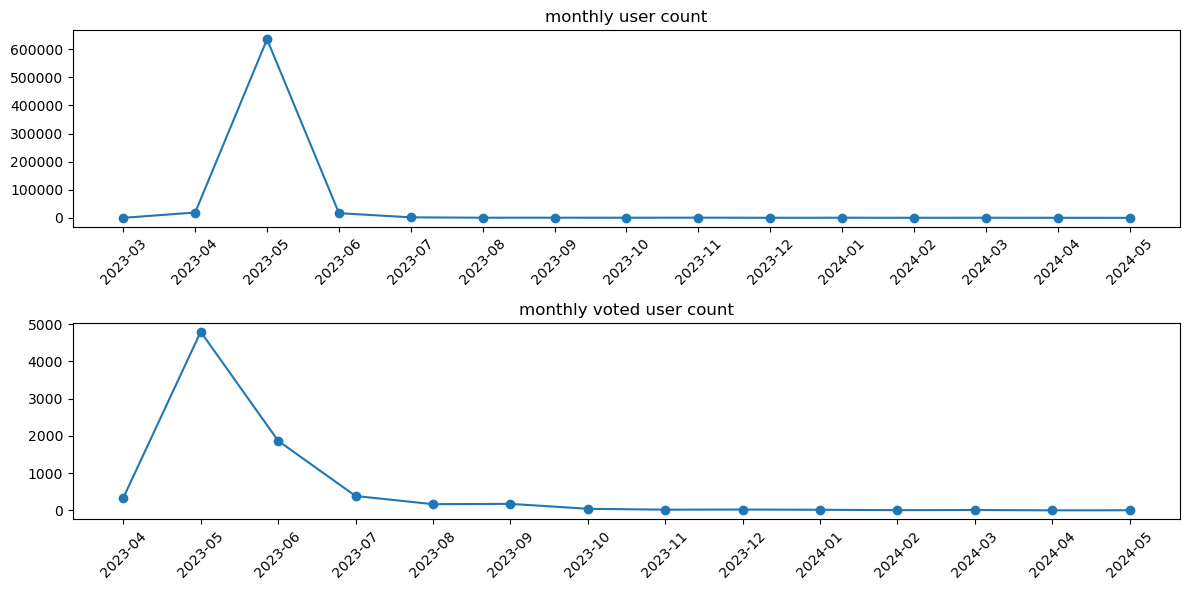

In [17]:
display(monthly_user_count)
display(monthly_voted_user_count)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), tight_layout=True)
ax1.plot(monthly_user_count['created_at_month'].astype(str), monthly_user_count['user_count'], marker='o', label='월별 유저 수')
ax2.plot(monthly_voted_user_count['created_at_month'].astype(str), monthly_voted_user_count['voted_user_count'], marker='o', label='월별 투표한 유저 수')
ax1.set_title('monthly user count')
ax2.set_title('monthly voted user count')
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)